In [1]:
import pandas as pd 
import numpy as np 
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split 
import seaborn as sns 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno

# Reading & Merging Data

In [2]:
#this function is to read, transform and join 2 data frame

def read_features():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature_'+str(x+1) for x in range(len(df.columns))]
    return df



def read_target():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#for the testing purporse, trim to remain first 100 rows only
X = read_features()
y = read_target().iloc[:,0]

In [3]:
#Row & Columns of Features 
X.shape

(1567, 590)

# Split Training & Test Data 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)

In [5]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4607,0.0155,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4206,-0.0052,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4964,0.0204,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.4428,-0.0110,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4950,-0.0097,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4830,-0.0328,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4440,-0.0079,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4281,0.0049,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3687,-0.0070,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


In [6]:
#Rows and Columns of X_Train DF
x_train.shape

(1253, 590)

# Reducing Dimensionality

## Remove Duplicated Columns

In [7]:
#find the duplicated features (columns)
def remove_duplicated_columns(df):
    dict_duplicate_pair = {}
    dict_duplicate_matches = {}
    list_duplicate = []
    to_remove = []
    for i in range(0, len(df.columns)):
        l = []
        for j in range(i+1,len(df.columns)):
            dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df.iloc[:,i].equals(df.iloc[:,j])
            if df.iloc[:,i].equals(df.iloc[:,j]) == True:
                if j not in list_duplicate:
                    l.append(j)
                    to_remove.append('feature_'+str(j+1))
                list_duplicate.append(i)
                list_duplicate.append(j)
        if len(l)!=0:
            dict_duplicate_matches[i] = l


    df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
    df_duplicate_pair.columns=['duplicate']

    df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

    
    df = df.drop(columns=to_remove, axis = 1)

    return df

In [8]:
x_train = remove_duplicated_columns(x_train)
x_train.shape

(1253, 486)

## Removing Features with Constant Volatility 

In [9]:
def remove_constant_volatility(df):
    df_EDA= df.describe().T
    df_EDA= df_EDA[df_EDA["std"] == 0]
    df = df.drop(axis=1, columns=df_EDA.index)
    return df

x_train = remove_constant_volatility(x_train)
x_train.shape

(1253, 474)

In [85]:
#Dataframe missing values 
x_train_nas1 = pd.DataFrame(x_train.isnull().sum()).rename(columns={0:'Missing_Records'})
x_train_nas1per = pd.DataFrame(x_train.isna().sum()/(len(x_train))*100)
x_train_nas1 = pd.concat([x_train_nas1, x_train_nas1per], axis=1).rename(columns={0:'Percentage (%)'})
x_train_nas1.shape

(466, 2)

In [91]:
#New Column as Bin categories is created within the new Dataframe 
bins = [-1, 0, 1, 5, 20, 55, 79, 99]
labels = ['no NAs', 'upto 1%', '2 to 5%', '6 to 20%', '21 to 55%', '56 to 79%', '80 to 99']
order = ['no NAs', 'upto 1%', '2 to 5%', '6 to 20%', '21 to 55%', '56 to 79%', '80 to 99']
x_train_nas1['NA Category'] = pd.cut(x_train_nas1['Percentage (%)'], bins, labels=labels)
x_train_nas1

,Missing_Records,Percentage (%),NA Category
feature_1,5,0.399042,upto 1%
feature_2,6,0.478851,upto 1%
feature_3,10,0.798085,upto 1%
feature_4,10,0.798085,upto 1%
feature_5,10,0.798085,upto 1%
...,...,...,...
feature_586,1,0.079808,upto 1%
feature_587,1,0.079808,upto 1%
feature_588,1,0.079808,upto 1%
feature_589,1,0.079808,upto 1%


In [73]:
test123 = x_train_nas1.to_csv('output')

In [93]:
#Frequency Distribution in Bins
order = ['no NAs', 'upto 1%', '2 to 5%', '6 to 20%', '21 to 55%', '56 to 79%', '80 to 99']
x_train_nas1['NA Category'].value_counts().loc[order]

no NAs        84
upto 1%      292
2 to 5%       46
6 to 20%      20
21 to 55%      8
56 to 79%     16
80 to 99       0
Name: NA Category, dtype: int64

<AxesSubplot:title={'center':'Frequency Distribution of Missing Values per Feature'}>

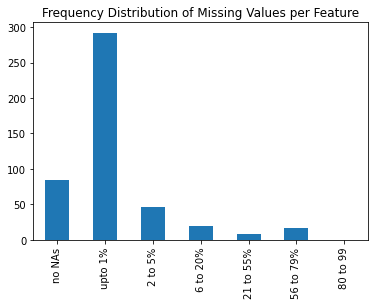

In [94]:
#Simple Bar Chart 
order = ['no NAs', 'upto 1%', '2 to 5%', '6 to 20%', '21 to 55%', '56 to 79%', '80 to 99']
x_train_nas1['NA Category'].value_counts().loc[order].plot(kind='bar', title='Frequency Distribution of Missing Values per Feature', grid=False)


Text(0.5, 1.0, 'Frequency Distribution of Features with Percentages of Missing Values')

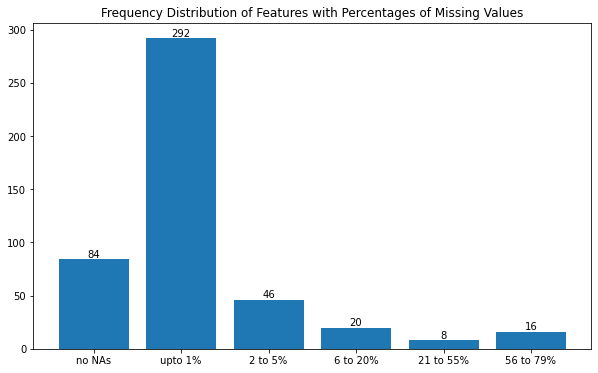

In [96]:
fig, ax = plt.subplots()
order = ['no NAs', 'upto 1%', '2 to 5%', '6 to 20%', '21 to 55%', '56 to 79%']
bars = ax.bar(order, x_train_nas1['NA Category'].value_counts().loc[order])
ax.bar_label(bars)
fig.set_size_inches(10, 6)
plt.title('Frequency Distribution of Features with Percentages of Missing Values')

## Remove Features with high % of Missing Values

In [84]:
def remove_cols_with_high_pct_null(df, null_threshold):
    list_column_with_pct_null = pd.concat([df.isnull().sum(), df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    list_column_with_pct_null= list_column_with_pct_null[list_column_with_pct_null["Percentage (%)"] >= null_threshold]
    df = df.drop(axis=1, columns=list_column_with_pct_null.index)
    return df

x_train = remove_cols_with_high_pct_null(x_train, 0.8)
x_train.shape

(1253, 466)

# Outlier Treatment

## Detect Outliers

In [97]:
dict_outliers = {}
for col in x_train.columns:
    ll_col = x_train[col].mean() - 3 * x_train[col].std()
    ul_col = x_train[col].mean() + 3 * x_train[col].std()
    dict_outliers[col] = ((x_train[col] < ll_col) | (x_train[col] > ul_col)).sum()


In [98]:
dict_outliers_perc = {}
for col in x_train.columns:
    ll_col = x_train[col].mean() - 3 * x_train[col].std()
    ul_col = x_train[col].mean() + 3 * x_train[col].std()
    dict_outliers_perc[col] = ((x_train[col] < ll_col) | (x_train[col] > ul_col)).sum()/len(x_train)

In [99]:
df_outliers = pd.DataFrame.from_dict(dict_outliers, orient='index').rename(columns={0:'Number of Outliers'})
df_outliers_perc = pd.DataFrame.from_dict(dict_outliers_perc, orient='index').rename(columns={0:'% Outliers per Column'})
df_outlier3s = pd.concat([df_outliers,df_outliers_perc], axis =1 )
df_outlier3s

,Number of Outliers,% Outliers per Column
feature_1,13,0.010375
feature_2,19,0.015164
feature_3,11,0.008779
feature_4,23,0.018356
feature_5,3,0.002394
...,...,...
feature_586,2,0.001596
feature_587,9,0.007183
feature_588,17,0.013567
feature_589,18,0.014366


In [100]:
df_outlier3s['% Outliers per Column'] = df_outlier3s['% Outliers per Column'].astype('float')

In [101]:
df_outlier3s.sort_values('Number of Outliers', ascending=False)

,Number of Outliers,% Outliers per Column
feature_39,60,0.047885
feature_577,57,0.045491
feature_575,55,0.043895
feature_578,50,0.039904
feature_573,50,0.039904
...,...,...
feature_501,0,0.000000
feature_512,0,0.000000
feature_540,0,0.000000
feature_541,0,0.000000


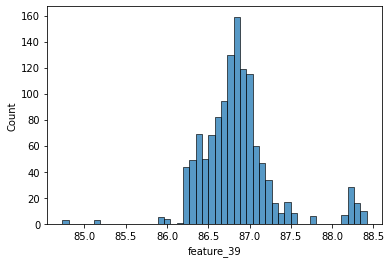

In [18]:
sns.histplot(x=x_train.feature_39)
plt.show()

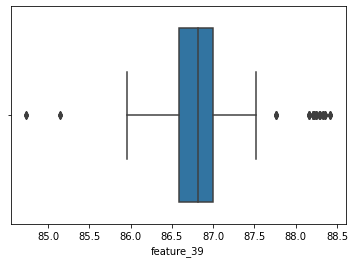

In [19]:
sns.boxplot(x=x_train.feature_39)
plt.show()

In [102]:
#Number of Features without Outliers
len(df_outlier3s.loc[(df_outlier3s['Number of Outliers'] == 0)])

32

In [103]:
#Number of Features with Outliers
len(df_outlier3s.loc[(df_outlier3s['Number of Outliers'] > 0)])

434

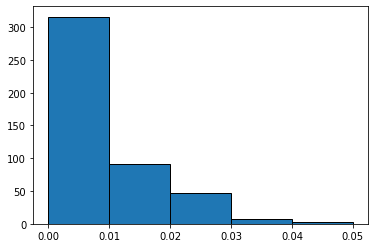

In [22]:
#Histogram
bins = [0,0.01, 0.02, 0.03, 0.04, 0.05]
plt.hist(df_outlier3s['% Outliers per Column'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

In [104]:
#Preparation of Bar Chart without Features with no Outliers: We first create a new dataframe including features with outliers only
df_bar_outlier = df_outlier3s.loc[(df_outlier3s['Number of Outliers'] > 0)]
df_bar_outlier

,Number of Outliers,% Outliers per Column
feature_1,13,0.010375
feature_2,19,0.015164
feature_3,11,0.008779
feature_4,23,0.018356
feature_5,3,0.002394
...,...,...
feature_586,2,0.001596
feature_587,9,0.007183
feature_588,17,0.013567
feature_589,18,0.014366


In [107]:
#New Column as Bin categories is created within the new Dataframe 
bins = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05]
labels = [ 'upto 1%', '1 to 2%', '2 to 3%', '3 to 4%', '4 to 5%']
df_bar_outlier['Outlier Category'] = pd.cut(df_bar_outlier['% Outliers per Column'], bins, labels=labels)
df_bar_outlier

/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_46467/4196851083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_outlier['Outlier Category'] = pd.cut(df_bar_outlier['% Outliers per Column'], bins, labels=labels)


,Number of Outliers,% Outliers per Column,Outlier Category
feature_1,13,0.010375,1 to 2%
feature_2,19,0.015164,1 to 2%
feature_3,11,0.008779,upto 1%
feature_4,23,0.018356,1 to 2%
feature_5,3,0.002394,upto 1%
...,...,...,...
feature_586,2,0.001596,upto 1%
feature_587,9,0.007183,upto 1%
feature_588,17,0.013567,1 to 2%
feature_589,18,0.014366,1 to 2%


<AxesSubplot:title={'center':'Frequency of % of Outliers per Feature '}>

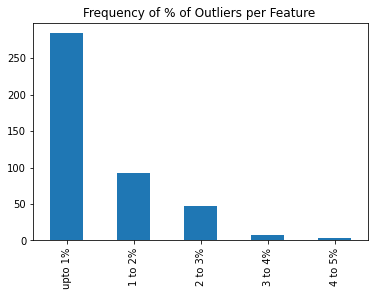

In [52]:
#Simple Bar Chart 
df_bar_outlier['Outlier Category'].value_counts(ascending=False).plot(kind='bar', title='Frequency of % of Outliers per Feature ', grid=False)


In [108]:
#Frequency Counts 
df_bar_outlier['Outlier Category'].value_counts(ascending=False)

upto 1%    284
1 to 2%     92
2 to 3%     47
3 to 4%      8
4 to 5%      3
Name: Outlier Category, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Features with Percentages of Missing Values')

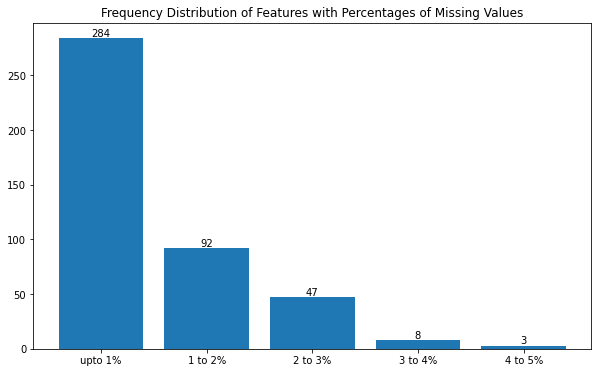

In [110]:
fig, ax = plt.subplots()
order_out = ['upto 1%', '1 to 2%', '2 to 3%', '3 to 4%', '4 to 5%']
bars = ax.bar(order_out, df_bar_outlier['Outlier Category'].value_counts().loc[order_out])
ax.bar_label(bars)
fig.set_size_inches(10, 6)
plt.title('Frequency Distribution of Features with Percentages of Outliers')

## Clamp Transformation 


In [27]:
#Definition of Functiom
def outlier_clamp(df):
    for col in df.columns:
        ll_col = df[col].mean() - 3 * df[col].std()
        ul_col = df[col].mean() + 3 * df[col].std()
        df[col] = np.where(df[col]>ul_col,ul_col,np.where(df[col]<ll_col,ll_col,df[col]))
    return df

In [28]:
x_train_clamp = outlier_clamp(x_train)
x_train_clamp

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
443,3079.77,2354.51,2207.0444,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


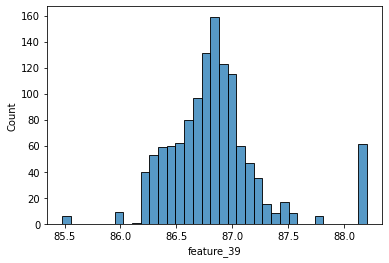

In [29]:
sns.histplot(x=x_train_clamp.feature_39)
plt.show()

(array([  9.,  46., 122., 142., 176., 298., 223., 103.,  31.,  29.]),
 array([85.9594 , 86.11587, 86.27234, 86.42881, 86.58528, 86.74175,
        86.89822, 87.05469, 87.21116, 87.36763, 87.5241 ]),
 <BarContainer object of 10 artists>)

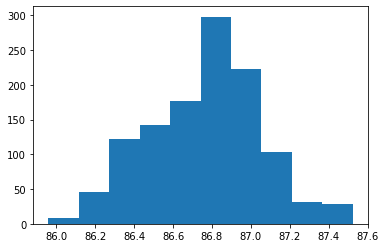

In [90]:
plt.hist(x_train_clamp.feature_39)

## Drop Entirely

In [87]:
#Outlier dropping 
def outlierdrop(df):
    #Outlier treatment first:
    for col in df.columns:
        ll_col = df[col].mean() - 3 * df[col].std()
        ul_col = df[col].mean() + 3 * df[col].std()
        df[col] = np.where(df[col]>ul_col,np.NaN,np.where(df[col]<ll_col,np.NaN,df[col]))
        return df

In [88]:
x_train_drop = outlierdrop(x_train)

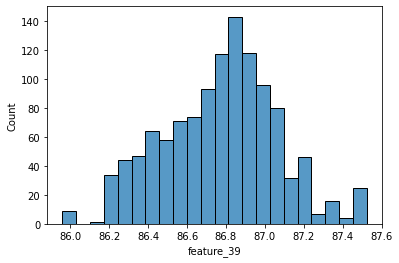

In [89]:
sns.histplot(x=x_train_drop.feature_39)
plt.show()

## Drop and Treat line NA

### KNN

In [33]:
#Outlier AND KNN 
def outlierknn(df):
    #Outlier treatment first:
    for col in df.columns:
        ll_col = df[col].mean() - 3 * df[col].std()
        ul_col = df[col].mean() + 3 * df[col].std()
        df[col] = np.where(df[col]>ul_col,np.NaN,np.where(df[col]<ll_col,np.NaN,df[col]))
    #Scaling data 
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
    #KNN Imputation 
    knn = KNNImputer(n_neighbors=5, weights='distance')
    df = pd.DataFrame(knn.fit_transform(df), columns=df.columns)
    #Reverse Scaling
    df = pd.DataFrame(scaler.inverse_transform(df), columns= df.columns)
    return df  

In [91]:
#Outlier AND KNN 
def outlierknnuni(df):
    #Outlier treatment first:
    for col in df.columns:
        ll_col = df[col].mean() - 3 * df[col].std()
        ul_col = df[col].mean() + 3 * df[col].std()
        df[col] = np.where(df[col]>ul_col,np.NaN,np.where(df[col]<ll_col,np.NaN,df[col]))
    #Scaling data 
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
    #KNN Imputation 
    knn = KNNImputer(n_neighbors=5, weights='uniform')
    df = pd.DataFrame(knn.fit_transform(df), columns=df.columns)
    #Reverse Scaling
    df = pd.DataFrame(scaler.inverse_transform(df), columns= df.columns)
    return df  

In [92]:
x_train_knn_uni = outlierknnuni(x_train)

In [34]:
x_train_knn = outlierknn(x_train)

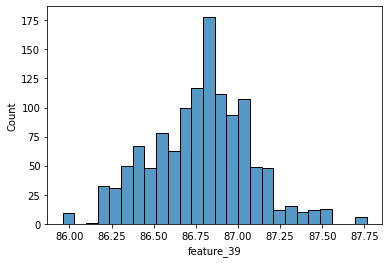

In [35]:
sns.histplot(x=x_train_knn.feature_39)
plt.show()

### MICE

In [36]:
#Outlier AND MICE 
def outliermice(df):
    #Outlier treatment first:
    for col in df.columns:
        ll_col = df[col].mean() - 3 * df[col].std()
        ul_col = df[col].mean() + 3 * df[col].std()
        df[col] = np.where(df[col]>ul_col,np.NaN,np.where(df[col]<ll_col,np.NaN,df[col]))
    imp = IterativeImputer(max_iter=5, verbose=0, imputation_order='roman', random_state=0)
    df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
    return df

In [61]:
x_train_mice = outliermice(x_train)

/Users/arasdirekoglu/opt/anaconda3/envs/dscience/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


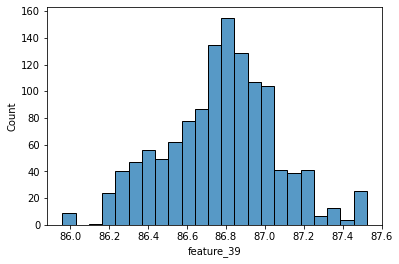

In [62]:
sns.histplot(x=x_train_mice.feature_39)
plt.show()

# Missing Values

## Missing Value Detection

In [39]:
#All Missing Values 
x_train.isnull().sum().sum()

34391

In [40]:
#All Values available
x_train.count().sum()

549507

In [41]:
#Percentage of Missing Values in the entire Dataframe
x_train.isnull().sum().sum() / x_train.count().sum()*100

6.258518999757964

In [76]:
#Dataframe missing values 
x_train_nas = pd.DataFrame(x_train.isnull().sum()).rename(columns={0:'Missing_Records'})
x_train_nasper = pd.DataFrame(x_train.isna().sum()/(len(x_train))*100)
x_train_nas = pd.concat([x_train_nas, x_train_nasper], axis=1).rename(columns={0:'Percentage (%)'})
x_train_nas

,Missing_Records,Percentage (%)
feature_1,5,0.399042
feature_2,6,0.478851
feature_3,10,0.798085
feature_4,10,0.798085
feature_5,10,0.798085
...,...,...
feature_586,1,0.079808
feature_587,1,0.079808
feature_588,1,0.079808
feature_589,1,0.079808


In [77]:
x_train_nas.sort_values('Missing_Records', ascending=False)

,Missing_Records,Percentage (%)
feature_293,1144,91.300878
feature_294,1144,91.300878
feature_158,1144,91.300878
feature_159,1144,91.300878
feature_493,1072,85.554669
...,...,...
feature_251,0,0.000000
feature_252,0,0.000000
feature_253,0,0.000000
feature_255,0,0.000000


In [78]:
#New Column as Bin categories is created within the new Dataframe 
bins = [0, 1, 5, 10, 20, 40, 80]
labels = ['upto 1%', '2 to 5%', '6 to 10%', '11 to 20%', '21 to 40%', '41 to 70%']
order = ['upto 1%', '2 to 5%', '6 to 10%', '11 to 20%', '21 to 40%', '41 to 70%']
x_train_nas['NA Category'] = pd.cut(x_train_nas['Percentage (%)'], bins, labels=labels)
x_train_nas

,Missing_Records,Percentage (%),NA Category
feature_1,5,0.399042,upto 1%
feature_2,6,0.478851,upto 1%
feature_3,10,0.798085,upto 1%
feature_4,10,0.798085,upto 1%
feature_5,10,0.798085,upto 1%
...,...,...,...
feature_586,1,0.079808,upto 1%
feature_587,1,0.079808,upto 1%
feature_588,1,0.079808,upto 1%
feature_589,1,0.079808,upto 1%


In [81]:
test12  = x_train_nas.to_csv('output12')

<AxesSubplot:title={'center':'Frequency Distribution of Missing Values per Feature'}>

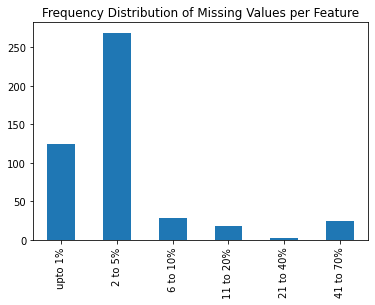

In [58]:
#Simple Bar Chart 
order = ['upto 1%', '2 to 5%', '6 to 10%', '11 to 20%', '21 to 40%', '41 to 70%']
x_train_nas['NA Category'].value_counts().loc[order].plot(kind='bar', title='Frequency Distribution of Missing Values per Feature', grid=False)


In [79]:
#Frequency Distribution in Bins
x_train_nas['NA Category'].value_counts(ascending=False)

upto 1%      292
2 to 5%       46
41 to 70%     24
11 to 20%     20
6 to 10%       0
21 to 40%      0
Name: NA Category, dtype: int64

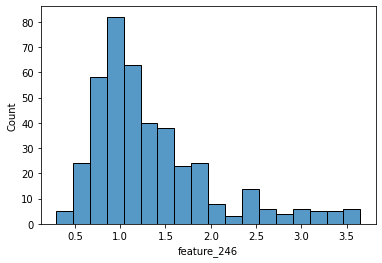

In [60]:
sns.histplot(x=x_train.feature_246)
plt.show()

<AxesSubplot:>

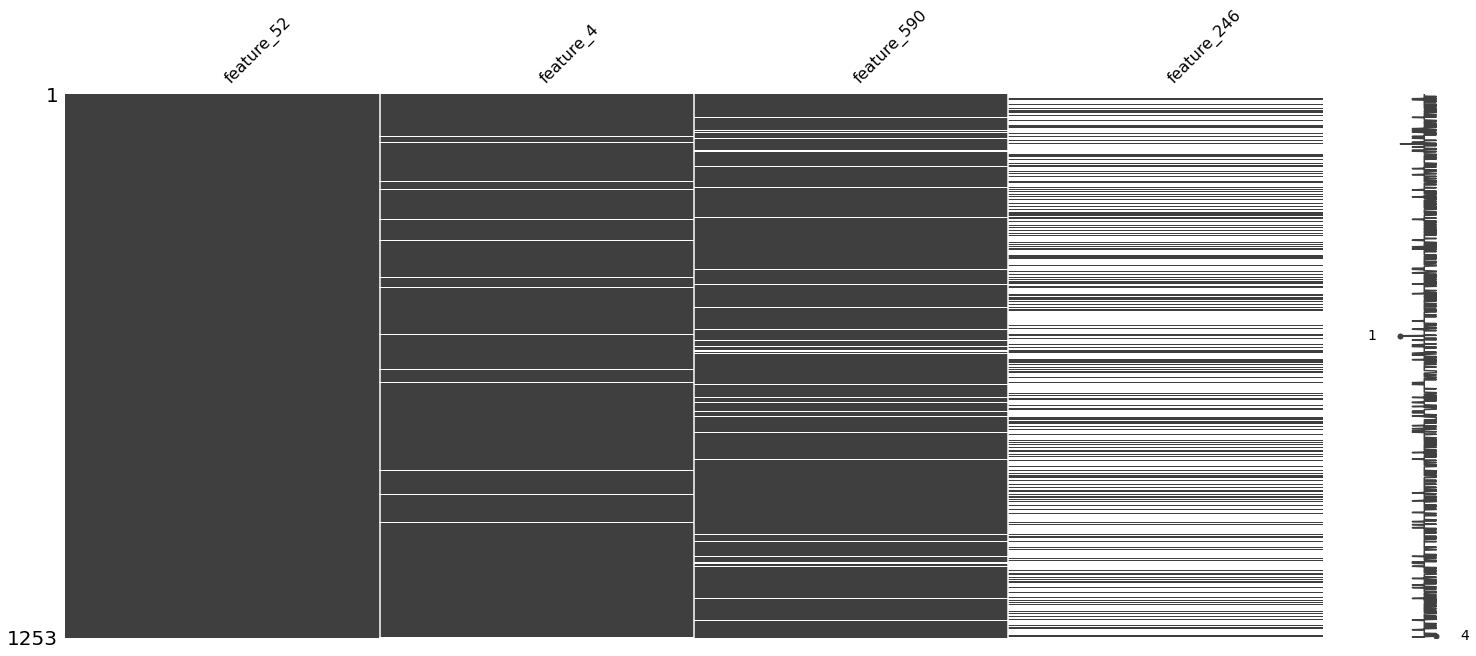

In [72]:
msno.matrix(x_train[['feature_52', 'feature_4', 'feature_590', 'feature_246']])

<AxesSubplot:>

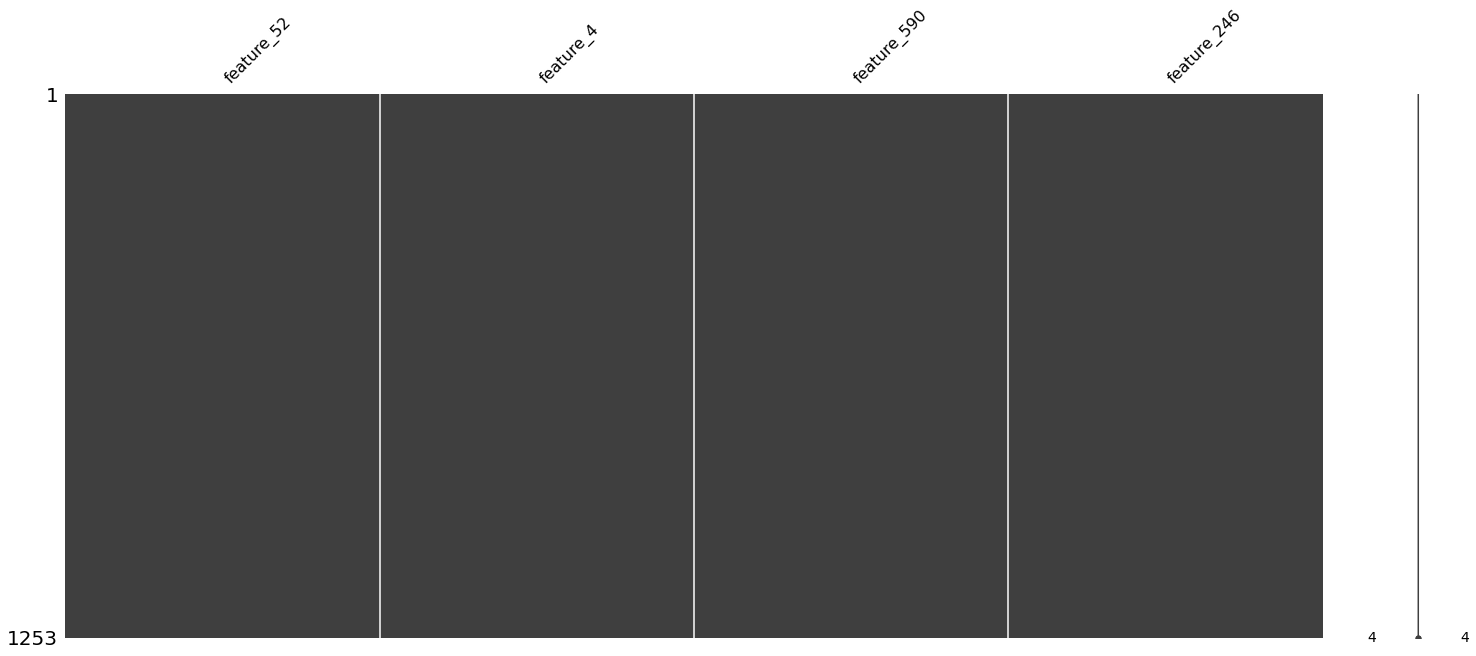

In [73]:
msno.matrix(x_train_knn[['feature_52', 'feature_4', 'feature_590', 'feature_246']])

In [95]:
x_train.feature_246.describe()

count    401.000000
mean       1.284497
std        0.574982
min        0.291400
25%        0.881300
50%        1.118600
75%        1.564500
max        3.169000
Name: feature_246, dtype: float64

## Functions for Imputation

In [100]:
#KNN only uniform
def knnuni(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
    #KNN Imputation 
    knn = KNNImputer(n_neighbors=5, weights='uniform')
    df = pd.DataFrame(knn.fit_transform(df), columns=df.columns)
    #Reverse Scaling
    df = pd.DataFrame(scaler.inverse_transform(df), columns= df.columns)
    return df  

In [103]:
#New DF KNN only uniform
x_train_knnonly_uni = knnuni(x_train)

In [101]:
#KNN only distance
def knndistance(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
    #KNN Imputation 
    knn = KNNImputer(n_neighbors=5, weights='distance')
    df = pd.DataFrame(knn.fit_transform(df), columns=df.columns)
    #Reverse Scaling
    df = pd.DataFrame(scaler.inverse_transform(df), columns= df.columns)
    return df  

In [102]:
#New DF KNN only Distance 
x_train_knnonly_distance = knndistance(x_train)

In [104]:
#MICE only
def miceimp(df):
    imp = IterativeImputer(max_iter=5, verbose=0, imputation_order='roman', random_state=0)
    df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
    return df

In [105]:
#New DF MICE only
x_train_mice_only =miceimp(x_train)

/Users/arasdirekoglu/opt/anaconda3/envs/dscience/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Visualizations before after imputation 

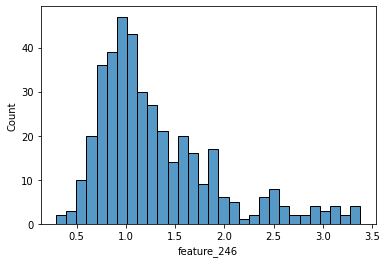

In [86]:
#BEFORE ANY IMPUTATION
sns.histplot(x=x_train.feature_246, bins=30)
plt.show()

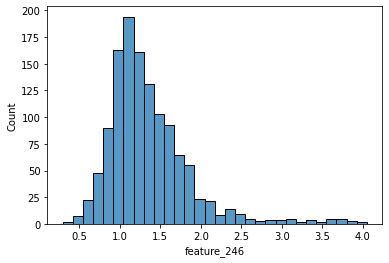

In [106]:
#Outlier + KNN 
sns.histplot(x=x_train_knn.feature_246,bins=30)
plt.show()

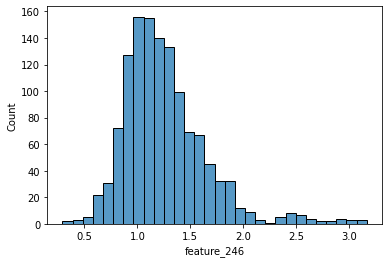

In [99]:
#KNN Only UNIFORM
sns.histplot(x=x_train_knnonly_uni.feature_246,bins=30)
plt.show()

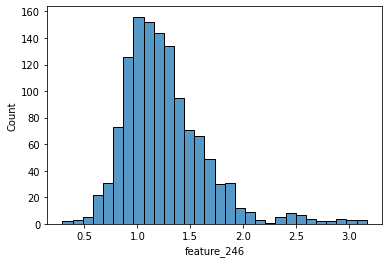

In [107]:
#KNN Only DISTANCE
sns.histplot(x=x_train_knnonly_distance.feature_246,bins=30)
plt.show()

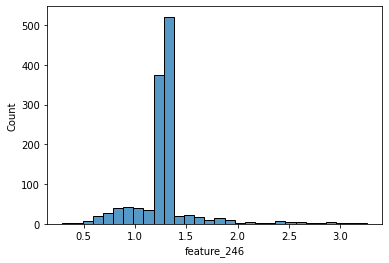

In [108]:
# MICE ONLY  
sns.histplot(x=x_train_mice_only.feature_246, bins=30)
plt.show()

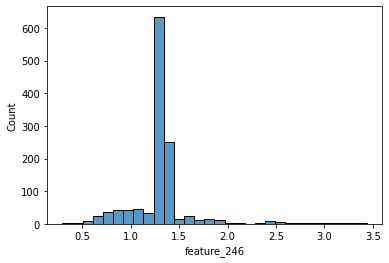

In [109]:
sns.histplot(x=x_train_mice.feature_246, bins=30)
plt.show()